In [25]:
!nvidia-smi

from google.colab import drive
drive.mount('/content/drive')

!rm -rf dataset sample_data sampleSubmission.csv test test1.zip train train.zip validation 
#!rm -rf cats_and_dogs_small_1.h5
!ls

Sun Jan 19 07:40:06 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    31W /  70W |   6755MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import os
os.environ['KAGGLE_USERNAME'] = 'xiaobaiji'
os.environ['KAGGLE_KEY'] = '0315eb1ff355a3031e30ba36d077037a' #Hope it is safe on Github.

In [27]:
!kaggle competitions download -c dogs-vs-cats

 98% 534M/543M [00:02<00:00, 216MB/s]
100% 543M/543M [00:02<00:00, 204MB/s]
 98% 265M/271M [00:02<00:00, 74.2MB/s]
100% 271M/271M [00:02<00:00, 107MB/s] 
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 27.5MB/s]


In [28]:
!ls '/content/'
!unzip train.zip

cats_and_dogs_small_1.h5  drive  sampleSubmission.csv  test1.zip  train.zip
Archive:  train.zip
   creating: train/
  inflating: train/cat.0.jpg         
  inflating: train/cat.1.jpg         
  inflating: train/cat.10.jpg        
  inflating: train/cat.100.jpg       
  inflating: train/cat.1000.jpg      
  inflating: train/cat.10000.jpg     
  inflating: train/cat.10001.jpg     
  inflating: train/cat.10002.jpg     
  inflating: train/cat.10003.jpg     
  inflating: train/cat.10004.jpg     
  inflating: train/cat.10005.jpg     
  inflating: train/cat.10006.jpg     
  inflating: train/cat.10007.jpg     
  inflating: train/cat.10008.jpg     
  inflating: train/cat.10009.jpg     
  inflating: train/cat.1001.jpg      
  inflating: train/cat.10010.jpg     
  inflating: train/cat.10011.jpg     
  inflating: train/cat.10012.jpg     
  inflating: train/cat.10013.jpg     
  inflating: train/cat.10014.jpg     
  inflating: train/cat.10015.jpg     
  inflating: train/cat.10016.jpg     
  inflatin

In [29]:
!ls '/content/train'
!mv '/content/train' '/content/dataset'
#!rm -rf train test sample_data validation sampleSubmission.csv dataset

cat.0.jpg      cat.3250.jpg  cat.7751.jpg   dog.12250.jpg  dog.5500.jpg
cat.10000.jpg  cat.3251.jpg  cat.7752.jpg   dog.12251.jpg  dog.5501.jpg
cat.10001.jpg  cat.3252.jpg  cat.7753.jpg   dog.12252.jpg  dog.5502.jpg
cat.10002.jpg  cat.3253.jpg  cat.7754.jpg   dog.12253.jpg  dog.5503.jpg
cat.10003.jpg  cat.3254.jpg  cat.7755.jpg   dog.12254.jpg  dog.5504.jpg
cat.10004.jpg  cat.3255.jpg  cat.7756.jpg   dog.12255.jpg  dog.5505.jpg
cat.10005.jpg  cat.3256.jpg  cat.7757.jpg   dog.12256.jpg  dog.5506.jpg
cat.10006.jpg  cat.3257.jpg  cat.7758.jpg   dog.12257.jpg  dog.5507.jpg
cat.10007.jpg  cat.3258.jpg  cat.7759.jpg   dog.12258.jpg  dog.5508.jpg
cat.10008.jpg  cat.3259.jpg  cat.775.jpg    dog.12259.jpg  dog.5509.jpg
cat.10009.jpg  cat.325.jpg   cat.7760.jpg   dog.1225.jpg   dog.550.jpg
cat.1000.jpg   cat.3260.jpg  cat.7761.jpg   dog.12260.jpg  dog.5510.jpg
cat.10010.jpg  cat.3261.jpg  cat.7762.jpg   dog.12261.jpg  dog.5511.jpg
cat.10011.jpg  cat.3262.jpg  cat.7763.jpg   dog.12262.jpg  dog.55

In [0]:
import os, shutil

base_dir = '/content/'
original_dataset_dir = '/content/dataset'

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats') 
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs') 
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats') 
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs') 
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats') 
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs') 
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(5000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(5000,7000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(7000,9000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(5000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(5000,7000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(7000,9000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

In [31]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 5000
total training dog images: 5000
total validation cat images: 2000
total validation dog images: 2000
total test cat images: 2000
total test dog images: 2000


In [0]:
from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.1))
#model.add(layers.Dense(512,kernel_regularizer=regularizers.l2(0.001),  activation='relu'))
model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [0]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [35]:
from keras.preprocessing.image import ImageDataGenerator

#Data Augmentation

#train_datagen = ImageDataGenerator(rescale=1.00/255)
train_datagen = ImageDataGenerator(rescale=1.00/255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1.00/255)

#train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=32, class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [36]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=20, validation_data=validation_generator, validation_steps=50)

Epoch 1/20
100/100 [==============================] - 33s 325ms/step - loss: 1.3649 - acc: 0.5138 - val_loss: 1.1515 - val_acc: 0.4869
Epoch 2/20
100/100 [==============================] - 29s 286ms/step - loss: 1.0020 - acc: 0.5441 - val_loss: 0.8884 - val_acc: 0.6281
Epoch 3/20
100/100 [==============================] - 30s 295ms/step - loss: 0.8495 - acc: 0.5853 - val_loss: 0.7836 - val_acc: 0.6512
Epoch 4/20
100/100 [==============================] - 29s 295ms/step - loss: 0.7766 - acc: 0.6059 - val_loss: 0.7608 - val_acc: 0.5931
Epoch 5/20
100/100 [==============================] - 30s 297ms/step - loss: 0.7515 - acc: 0.6122 - val_loss: 0.6985 - val_acc: 0.6538
Epoch 6/20
100/100 [==============================] - 28s 283ms/step - loss: 0.7110 - acc: 0.6350 - val_loss: 0.6744 - val_acc: 0.6744
Epoch 7/20
100/100 [==============================] - 28s 277ms/step - loss: 0.6933 - acc: 0.6647 - val_loss: 0.6435 - val_acc: 0.7188
Epoch 8/20
100/100 [==============================] - 2

In [0]:
model.save('cats_and_dogs_small_1.h5')

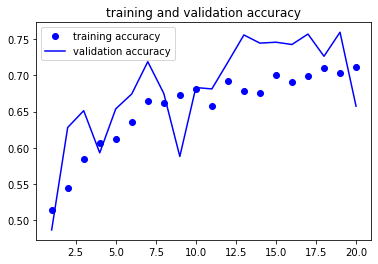

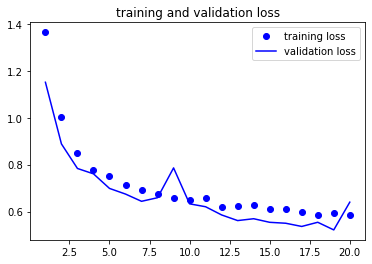

In [38]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

In [0]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [40]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [41]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.00/255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(directory, target_size=(150,150), batch_size=batch_size, class_mode='binary')
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i*batch_size : (i+1)*batch_size] = features_batch
    labels[i*batch_size : (i+1)*batch_size] = labels_batch
    i += 1
    if i*batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 10000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [0]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [43]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [44]:
print(len(model.trainable_weights))
conv_base.trainable = False
print(len(model.trainable_weights))

30
4


In [45]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
#Data Augmentation

#train_datagen = ImageDataGenerator(rescale=1.00/255)
train_datagen = ImageDataGenerator(rescale=1.00/255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1.00/255)

#train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=32, class_mode='binary')

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Found 10000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 30s 298ms/step - loss: 0.5766 - acc: 0.7081 - val_loss: 0.4183 - val_acc: 0.8488
Epoch 2/30
100/100 [==============================] - 27s 271ms/step - loss: 0.4655 - acc: 0.7906 - val_loss: 0.3549 - val_acc: 0.8706
Epoch 3/30
100/100 [==============================] - 28s 276ms/step - loss: 0.4122 - acc: 0.8197 - val_loss: 0.3099 - val_acc: 0.8681
Epoch 4/30
100/100 [==============================] - 27s 273ms/step - loss: 0.3800 - acc: 0.8334 - val_loss: 0.2954 - val_acc: 0.8806
Epoch 5/30
100/100 [==============================] - 27s 266ms/step - loss: 0.3661 - acc: 0.8359 - val_loss: 0.2896 - val_acc: 0.8806
Epoch 6/30
100/100 [==============================] - 26s 258ms/step - loss: 0.3624 - acc: 0.8412 - val_loss: 0.2723 - val_acc: 0.8919
Epoch 7/30
100/100 [==============================] - 26s 264ms/step - loss: 0.3511 - acc: 0.8459 - val_l

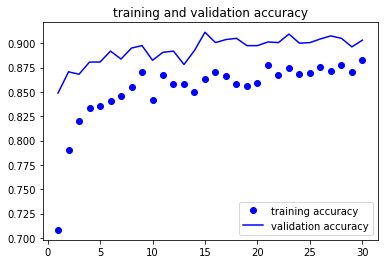

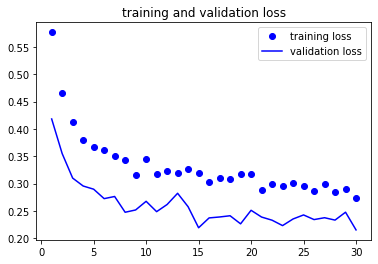

In [47]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

In [48]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [50]:
#Fine tuning

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False
  print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True


In [52]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=50, validation_data=validation_generator, validation_steps=50)

Epoch 1/50
100/100 [==============================] - 32s 320ms/step - loss: 0.2885 - acc: 0.8681 - val_loss: 0.2136 - val_acc: 0.9069
Epoch 2/50
100/100 [==============================] - 29s 286ms/step - loss: 0.2693 - acc: 0.8912 - val_loss: 0.2084 - val_acc: 0.9231
Epoch 3/50
100/100 [==============================] - 29s 288ms/step - loss: 0.2458 - acc: 0.8950 - val_loss: 0.1877 - val_acc: 0.9313
Epoch 4/50
100/100 [==============================] - 28s 282ms/step - loss: 0.2454 - acc: 0.8925 - val_loss: 0.2087 - val_acc: 0.9194
Epoch 5/50
100/100 [==============================] - 29s 286ms/step - loss: 0.2220 - acc: 0.9106 - val_loss: 0.2065 - val_acc: 0.9194
Epoch 6/50
100/100 [==============================] - 27s 272ms/step - loss: 0.2397 - acc: 0.9044 - val_loss: 0.2042 - val_acc: 0.9175
Epoch 7/50
100/100 [==============================] - 28s 278ms/step - loss: 0.1974 - acc: 0.9131 - val_loss: 0.1553 - val_acc: 0.9363
Epoch 8/50
100/100 [==============================] - 2

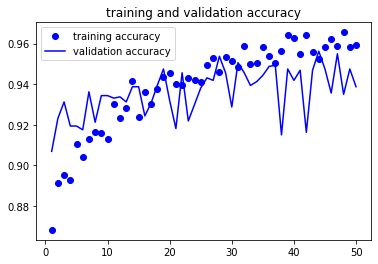

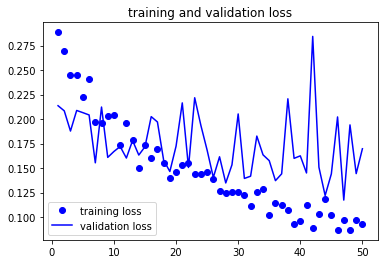

In [53]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

In [55]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=20, class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test accuracy:', test_acc)

Found 4000 images belonging to 2 classes.
test accuracy: 0.9499999940395355
